# EXERCISE 1: KILAUEA MELT AND FLUID INCLUSIONS

In this notebook you will learn how to analyze melt inclusion (MI) data in order to estimate the depths of entrapment of each MI using compositional information. To do so, we will be using geochemical and solubility modeling since the solubility of H<sub>2</sub>O and CO<sub>2</sub> are directly controlled by the pressure (and thus depth) at which the MI was entrapped in its host crystal. For this exercise we have provided an excel spreadsheet containing some of the data from Wieser et al. (2021) who performed measurements on the compositions of melt and vapor phases in a set of crystals from Kilauea volcano, Hawaii. The same data is provided in an accompanying csv file. The presence of bubbles within MI can be due to diffusion of CO<sub>2</sub> out of the glassy portion of the MI at high temperature. Raman spectroscopy can be used to measure the abundance of CO<sub>2</sub> within these bubbles.

For more help using VESIcal, use the following resources:

**ReadTheDocs**
- How-to's, tips, tricks, and complete code documentation: [https://vesical.readthedocs.io/en/latest/](https://vesical.readthedocs.io/en/latest/)

**Interactive versions of manuscripts**
- Curvenote/AGU Notebooks Now! implementation of VESIcal Part I manuscript: [Manuscript on Curvenote](https://agu.curve.space/articles/NN0001)
- Direct link to interactive jupyter notebook version of VESIcal Part I manuscript: [Manuscript on Binder](https://agu-binder.curvenote.dev/user/2be900e9-fb5d-4-9778d16a48c.zip-4wrcztow/lab/tree/Manuscript.ipynb?token=EzBUfh6US4qFq4UW0MSkYA)
- Jupyter Notebook hub with VESIcal: [Manuscript on Binder](https://mybinder.org/v2/gh/kaylai/vesical-binder/HEAD>)

**PDF versions of manuscripts**
- [VESIcal Part I: An Open-Source Thermodynamic Model Engine for Mixed Volatile (H2O-CO2) Solubility in Silicate Melts](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020EA001584)
- [VESIcal Part II: A critical approach to volatile solubility modelling using an open-source Python3 engine](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021EA001932)

**GitHub with VESIcal code**
- [https://github.com/kaylai/VESIcal](https://github.com/kaylai/VESIcal)

<hr>

# EXERCISE INSTRUCTIONS AND QUESTIONS


## You are provided with:
1. Glass inclusion compositions (corrected for post-entrapment crystallization), including H<sub>2</sub>O and CO<sub>2</sub> concentrations;
2. The volumetric size of any bubble present in the inclusion (vapor bubble vol%);
3. The CO<sub>2</sub> Fermi diad separation,  $\Delta(cm^{-1}$) from Raman analyses.

- Download the dataset for Kilauea Volcano melt and fluid inclusions at: [Link]()
- The answer key to this notebook is in the form of a CSV file that should match the file created at the end of this notebok and can be downloaded here: [Link]()


## Questions to answer:
### 1. Calculate saturation pressures for the melt inclusions based on the H<sub>2</sub>O and CO<sub>2</sub> concentrations of the glasses, using VESIcal.
### 2. Calculate the density of the melt as represented by the glass compositions using DensityX (Iacovino & Till, 2019).
### 3. Calculate the density of the CO<sub>2</sub> in the bubbles using the equation to convert the diad separation into density. 
Here we will run through a simplified calculation using empiracle regressions from Fall et al. (2011) and Wieser and DeVitre (2024). Fall et al. (2011) provides an equation that only requires the Fermi diad separation value as an input:

$\rho = -0.030314551 \Delta^{3} + 9.432834797 \Delta^{2} - 977.9384933 \Delta + 33780.38242$

Where $\rho$ is the density and $\Delta$ is the separation distance between the two peaks of the Fermi diad in cm<sup>-1</sup>. The python3 program [DiadFit (Wieser and DeVitre, 2024)](https://www.jvolcanica.org/ojs/index.php/volcanica/article/view/252) can be used to process Raman spectroscopy data and provide a fit to measured peaks and correct for instrument drift. Wieser and DeVitre (2024) provided the necessary values of correction factor, regression gradient, and regression intercept that allow us to calculate CO<sub>2</sub> densities with their corrections. We'll create a second function to solve:

$\rho = \Delta \times Corr \times Regr_{gradient} \times Regr_{intercept}$

Where $\rho$ is again the density, $\Delta$ is again the Fermi diad separation, $Corr$ is the correction factor, $Regr_{gradient}$ is the gradient of the regression through their data, and $Rerg_{intercept}$ is the intercept of the regression through their data.

### 4. Calculate the concentration of CO<sub>2</sub> in the bubble (in ppm) using:

$[CO_2]^{VB} = 10^4 \times \frac{\rho_{CO_2} V_{VB}}{\rho_{melt}V_{melt}}$

where $V_{VB}$ and $V_{melt}$ are the volume of the vapor bubble and the melt phase of the inclusion, respectively, and $\rho_{melt}$ is the density of the silicate melt.

### 5. Calculate the total amount of CO<sub>2</sub> in the inclusion (in ppm):

$[CO_2]^{Tot} = [CO_2]^{VB} + [CO_2]^{melt}$

### 6. Use the total volatile contents of the inclusions to calculate saturation pressures using VESIcal.
Compare these pressures to those you calculated in 1. What can you conclude about the importance of analyzing bubbles in melt inclusions?

## Citations
1. Fall, A., Tattitch, B. & Bodnar, R. J. (2011) Combined microthermometric and Raman spectroscopic technique to determine the salinity of H2O–CO2–NaCl fluid inclusions based on clathrate melting. Geochim. Cosmochim. Acta 75, 951–964.

2. Iacovino, K., Matthews, S., Wieser, P. E., Moore, G. M., & Bégué, F. (2021). VESIcal Part I: An open‐source thermodynamic model engine for mixed volatile (H2O‐CO2) solubility in silicate melts. Earth and Space Science, 8(11), e2020EA001584.

3. Lerner, A. H., Sublett, D. M., Wallace, P. J., Cauley, C. & Bodnar, R. J. (2024) Insights into magma storage depths and eruption controls at Kīlauea Volcano during explosive and effusive periods of the past 500 years based on melt and fluid inclusions. Earth Planet. Sci. Lett. 628, 118579.

4. Wieser, P. E. et al. (2020) Reconstructing Magma Storage Depths for the 2018 Kı̄lauean Eruption from Melt inclusion CO2 Contents: The Importance of Vapor Bubbles. Geochem Geophys Geosystems (2020) doi:10.1029/2020gc009364.

5. Wieser, P. E., Iacovino, K., Matthews, S., Moore, G., & Allison, C. M. (2022). VESIcal: 2. A critical approach to volatile solubility modeling using an open‐source Python3 engine. Earth and Space Science, 9(2), e2021EA001932.

6. Wieser, P. E., & DeVitre, C. (2024). DiadFit: An open-source Python3 tool for peak fitting of Raman data from silicate melts and CO2 fluids. Volcanica, 7(1), 335-359.


<hr>


## Performing the calculations
For each question in this problem set, we will first illustrate how to calculate the various required values for a single sample, and then we will perform batch calculations to perform the calculations for the entire dataset at once. We will import an excel file with our data using VESIcal and create a BatchFile object that allows VESIcal to perform calcuations. We will also create a pandas DataFrame object called `data_values`, and we will add newly calculated values to this object as we perform each calculation.

## About this notebook
This notebook uses VESIcal to compute solubility curves, numpy for some math, pandas to handle dataframes, and matplotlib to plot. Pickle is used to "pickle" (save) computed values to memory and read them back in such that the computations do not need to be run each time the script is run (e.g., if it is desired to only update the plots).

If the MagmaSat model is desired (the default model in VESIcal), the ENKI thermoengine must also be installed on your machine to run this notebook. That is a bit cumbersome, so you may choose to only install VESIcal (without ENKI thermoengine, which is a separate install), which will allow you to use any model within VESIcal except for MagmaSat. In that case, we recommend chaging the `model` variable defined in 0.1 below from "MagmaSat" to "IaconoMarziano".

## 0. Import the necessary Python libraries

In [81]:
# import the VESIcal library
import VESIcal as v

# import the matplotlib library to perform plotting and numpy library for some math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle

### 0.1 Import Data and Define Notebook Settings

In [82]:
# import the Kilauea xlsx file as a VESIcal BatchFile object that VESIcal can understand
data = v.BatchFile('Wieser_Kilauea_Data.xlsx', sheet_name="VESIcal")

# Let's also save the data as a pandas DataFrame object in order to build on it in each step
data_values = data.get_data()

# pull out a single composition to perform calculations on just that sample
# pass asSampleClass=True to return a VESIcal Sample object that we can easily use in calculations
sample_LL8_613b = data.get_sample_composition("LL8_613b", asSampleClass=True)

# choose which model to use for all VESIcal solubility calculations.
model = "MagmaSat"

# If desired, display the entire data file (remove # in front of code to execute)
# It is highly recommended to do this whenever importing a file to check it was imported correctly.
# data.get_data()

# If desired, display the composition of sample LL8_613b (remove # in front of code to execute)
# sample_LL8_613b.get_composition()

/opt/anaconda3/lib/python3.9/site-packages/VESIcal/batchfile.py:165: RuntimeWarning: No Label column given, so column 'Sample Name' was chosen for you. To choose your own, set label='<column-name>'.
  data = self.try_set_index(data, label)


### 1. Calculate saturation pressures for the melt inclusions based on the H<sub>2</sub>O and CO<sub>2</sub> concentrations of the glasses, using VESIcal

#### Single Sample

Calculate and print the saturation pressure for sample K99 using the MagmaSat model (the default in VESIcal). If another model is desired, pass `model="desiredmodelhere"` to the `calculate_saturation_pressure()` function call. We will use 1200 $^{\circ}$ C, as the temperature for all samples. If temperature values were given in the xlsx file, we could use a unique temperature for each sample by passing the name of the column (e.g., "Temperature") as the value for the `temperature` argument. The saturation pressure will be returned in bars.

In [83]:
satP_LL8_613b =v.calculate_saturation_pressure(sample=sample_LL8_613b, temperature=1200, model=model).result
satP_LL8_613b

duanDriver-2: t = 1473.15, p = 16000, z = 3.1349, v = 2.39986, delv = 0, dx = -9.68453e-14, iter = 42


40.0

#### Batch Calculation (all samples)

Calculate and print the saturation pressure for all Kilauea samples using the MagmaSat model (the default in VESIcal). If another model is desired, pass `model="desiredmodelhere"` to the `calculate_saturation_pressure()` function call. We will use a value of 1200 $^{\circ}$ C for the temperature. If temperature values were given in the xlsx file, we could use a unique temperature for each sample by passing the name of the column (e.g., "Temperature") as the value for the `temperature` argument. The saturation pressures will be returned in bars as a column named "SaturationP_bars_VESIcal" in a new data table (pandas DataFrame).

Finally, save add the data calculated here to our `data_files` DataFrame.

The MagmaSat model can take a couple of minutes to run this calculation. If desired, you may comment out the code in the cell directly below and uncomment and execute the code in the following cell, which will import a pickle file with this calculation already performed. You can also use another model within VESIcal such as the IaconoMarziano model.

In [84]:
# Perform the calculation on the BatchFile "data"
satPs = data.calculate_saturation_pressure(temperature=1200, model=model)

# If desired, Print just the calculated saturation pressures
# print(satPs["SaturationP_bars_VESIcal"])

# Save our newly calculated pressures to the data_values DataFrame
data_values["SaturationP_bars_melt_only"] = satPs["SaturationP_bars_VESIcal"]

# Pickle the calculated values to import later if so desired
with open('pickle/satPs.pickle', 'wb') as handle:
    pickle.dump(satPs, handle)

[                    ] 2%  Working on sample LL8_613b                            duanDriver-2: t = 1473.15, p = 16000, z = 3.1349, v = 2.39986, delv = 0, dx = -9.68453e-14, iter = 42
[=                   ] 7%  Working on sample LL8_623_b                            duanDriver-2: t = 1473.15, p = 6000, z = 2.17687, v = 4.44388, delv = 0, dx = -2.33046e-14, iter = 40
[===                 ] 17%  Working on sample LL8_612_a                            duanDriver-2: t = 1473.15, p = 6000, z = 2.39754, v = 4.89436, delv = 0, dx = -7.00647e-14, iter = 41
[====                ] 24%  Working on sample LL8_631a                             duanDriver-2: t = 1473.15, p = 11000, z = 3.44422, v = 3.83513, delv = 0, dx = -8.71628e-14, iter = 41
duanDriver-2: t = 1473.15, p = 9000, z = 3.0713, v = 4.17985, delv = 0, dx = -2.47578e-14, iter = 44
[=====               ] 26%  Working on sample LL8_616_b                            duanDriver-2: t = 1473.15, p = 20000, z = 3.38257, v = 2.07156, delv = 0, dx =

In [85]:
# # uncomment this code and execute to pull already computed values from a pickle file
# with open('pickle/satPs.pickle', 'rb') as handle:
#     satPs = pickle.load(handle)

# data_values["SaturationP_bars_melt_only"] = satPs["SaturationP_bars_VESIcal"]

### 2. Calculate the density of the melt as represented by the glass compositions using DensityX (Iacovino & Till, 2019)
The DensityX model can be imported separately or used within VESIcal. Here we will use the one that is already inside of the VESIcal library.

#### 2.1 Single Sample

Use the built-in function `calculate_liquid_density` to calculate the liquid density of sample LL8_613b. We will use the temperature value of 1200 $^{\circ}$ C and the saturation pressure calculated in question 1 above. Density values are returned in units of g/L.

In [86]:
liq_density_LL8_613b = v.calculate_liquid_density(sample=sample_LL8_613b, temperature=1200, pressure=satP_LL8_613b).result
liq_density_LL8_613b

2716.081

#### 2.2 Batch Calculation (all samples)

Use the built-in function `calculate_liquid_density` on the BatchFile object just created. As with Step 1, we will use 1200 $^{\circ}$ C for the temperature for all samples. Use the saturation pressures calculated in Question 1 above as a unique pressure for each sample by passing the "SaturationP_bars_VESIcal" column from the `satPs` variable created above. Density values are returned in units of g/L.

In [87]:
# Create a VESIcal BatchFile from our new data_values that contains our calculated saturation pressures
satPs = v.BatchFile_from_DataFrame(data_values)

liq_densities = satPs.calculate_liquid_density(temperature=1200, pressure="SaturationP_bars_melt_only")

# If desired, print just the calculated liquid densities
# print(liq_densities["Density_liq_VESIcal"])

# Save our new values to the data_values DataFrame
data_values["Density_liq_VESIcal"] = liq_densities["Density_liq_VESIcal"]

### 3. Calculate the density of the CO<sub>2</sub> in the bubbles using the equation to convert the diad separation into density

Here we will run through a simplified calculation using the empiracle regression from Fall et al. (2011):

$\rho = -0.030314551 \Delta^{3} + 9.432834797 \Delta^{2} - 977.9384933 \Delta + 33780.38242$

Where $\rho$ is the density and $\Delta$ is the separation distance between the two peaks of the Fermi diad in cm<sup>-1</sup>. The python3 program [DiadFit (Wieser and DeVitre, 2024)](https://www.jvolcanica.org/ojs/index.php/volcanica/article/view/252) can be used to process Raman spectroscopy data and provide a fit to measured peaks and correct for instrument drift. Wieser and DeVitre (2024) provided the necessary values of correction factor, regression gradient, and regression intercept that allow us to calculate CO<sub>2</sub> densities with their corrections. We'll create a second function to solve:

$\rho = \Delta \times Corr \times Regr_{gradient} \times Regr_{intercept}$

Where $\rho$ is again the density, $\Delta$ is again the Fermi diad separation, $Corr$ is the correction factor, $Regr_{gradient}$ is the gradient of the regression through their data, and $Rerg_{intercept}$ is the intercept of the regression through their data.

In the dataset from Kilauea that we are using here, the separation distance between the diad peaks has already been calculated, so we will use the $\Delta$ values from the xslx file under the column titled "CO2 Fermi Diad".

#### 3.1 Single Sample
Let's write a function to solve the equation given above for CO<sub>2</sub> vapor density, $\rho$.

In [88]:
def CO2_vapor_density_Fall(diad_separation):
     """
     A function to calculate the density, rho, of CO2 vapor given the Fermi diad separation in
     cm-1 from Raman data from Fall et al. (2011).

     Parameters
     ----------
     diad_separation:   float
        The Fermi diad separation in cm-1. Do not use data <10^3 cm-1, as this equation is
        poorly calibrated below that value.

      Returns
      -------
      float
         Vapor density of CO2, rho, in units of g/cm3
     """

     rho = (-0.030314551 * diad_separation**3 + 
            9.432834797 * diad_separation**2 -
            977.9384933 * diad_separation +
            33780.38242)
     
     return rho

def CO2_vapor_density_Wieser(diad_separation, correction_factor, regr_gradient, regr_intercept):
     """
     A function to calculate the density, rho, of CO2 vapor given the Fermi diad separation in
     cm-1 and correction factors from Raman data from Wieser and DeVitre (2024).

     Parameters
     ----------
     diad_separation:   float
        The Fermi diad separation in cm-1.
      
      correction_factor:   float
         Correction factor determined for the instrument used to take the Raman spectra. This is
         unique to each sample.
      
      regr_gradient:   float
         Gradient of the regression line through the standards used during Raman measurements.
      
      regr_intercept:   float
         The intercept of the regression line through the standards used during Raman measurements.

      Returns
      -------
      float
         Vapor density of CO2, rho, in units of g/cm3
     """

     rho = diad_separation * correction_factor * regr_gradient + regr_intercept
     
     return rho

Now, let's get the diad separation value for sample LL8_613b and use our function to calculate the vapor density, rho. We'll use the Wieser and Devitre (2024) equation to go with their data.

In [89]:
# Get the diad separation and correction factor values from our data file and save it to a variable
LL8_613b_diad_separation = data_values.loc["LL8_613b"]["Fermi diad separation"]
LL8_613b_correction_factor = data_values.loc["LL8_613b"]["Correction Factor"]

# The gradient and intercept of the regression of standards for these data are constant
regr_gradient = 0.321699687828446
regr_intercept = -32.9954729484350

# Use our function to calculate the vapor density, rho
rho_LL8_613b = CO2_vapor_density_Wieser(LL8_613b_diad_separation, LL8_613b_correction_factor, regr_gradient, regr_intercept)

# Print the pulled values and calculated vapor density, in units of g/cm3
print("Diad separation for sample LL8_613b = " + str(LL8_613b_diad_separation))
print("Correction factor for sample LL8_613b = " + str(LL8_613b_correction_factor))
print("The CO2 bubble vapor density for sample LL8_613b = " + str(rho_LL8_613b))

Diad separation for sample LL8_613b = 102.616121121121
Correction factor for sample LL8_613b = 1.00017797800926
The CO2 bubble vapor density for sample LL8_613b = 0.021976516641970534


#### 3.2 Batch Calculation (all samples)
Let's loop over the function we created above to solve for CO<sub>2</sub> vapor density, $\rho$, in all of our samples. We will use a for loop to perform the calculation on each row of our data_values object that we created in Step 0.

In [90]:
# Loop over each sample (row) in our Kilauea data
rho_values = [] # First, create an empty list to store our calculated values

for index, row in data_values.iterrows(): # begin the loop
    rho = CO2_vapor_density_Wieser(row["Fermi diad separation"], row["Correction Factor"],
                               regr_gradient, regr_intercept) # calculate each sample
    rho_values.append(rho) # add that rho value to our list
# Add our list of rho values to our original data table to easily examine the results
data_values["Density_CO2_bubble"] = rho_values

# If so desired, print out each sample name and the calculated rho value
# for index, row in data_values.iterrows():
#     print("Sample " + str(index) + " rho: " + str(row["Density_CO2_bubble"]))


### 4. Calculate the concentration of CO<sub>2</sub> in the bubble (in ppm) using:

$[CO_2]^{VB} = 10^4 \times \frac{\rho_{CO_2} V_{VB}}{\rho_{melt}V_{melt}}$

where $V_{VB}$ and $V_{melt}$ are the volume of the vapor bubble and the melt phase of the inclusion, respectively, and $\rho_{melt}$ is the density of the silicate melt.

The Kilauea data provide vapor and melt volumes within each inclusion in terms of the ratio, $V_{ratio}$ of the volume of the vapor bubble over the volume of the silicate melt. We can rewrite the above equation as:

$[CO_2]^{VB} = 10^4 \times V_{ratio} \times \frac{\rho_{CO_2}}{\rho_{melt}}$

#### 4.1 Single Sample
Let's write a function to solve the equation given above for CO<sub>2</sub> concentration in the vapor bubble, $[CO_2]^{VB}$.

In [91]:
def CO2_concentration_bubble(CO2_vapor_density, melt_density, volume_ratio):
    """
     A function to calculate the concentration of CO2 in a vapor bubble given densities of the CO2
     in the bubble and of the silicate melt and the volumes of the bubble and melt.

     Parameters
     ----------
     CO2_vapor_density:   float
        Vapor density of CO2, rho, in units of g/cm3
    
    melt_density:   float
        Density of the silicate melt, in units of g/L. This will need to be converted to g/cm3
        to match the units on the CO2_vapor_density, but we use g/L as an input since that is what
        is returned by VESIcal.
    
    volume_ratio:   float
        The ratio between the volume of the vapor and the volume of the silicate melt within the
        inclusion.

      Returns
      -------
      float
         The concentration of CO2 in the vapor bubble, in units of ppm
     """
    # translate melt density from g/L (output of VESIcal) to g/cm3 (needed for equation)
    melt_density_g_cm = melt_density / 1000.0

    CO2_conc = 10**4 * volume_ratio * CO2_vapor_density / melt_density_g_cm

    return CO2_conc

In [92]:
# Get the ratio of vapor to melt volume in the MI, as reported in the provided excel data
volume_ratio = data_values.loc["LL8_613b"]["VolBubble_VolMelt"]

CO2_ppm_LL8_613b = CO2_concentration_bubble(rho_LL8_613b, liq_density_LL8_613b, volume_ratio)
CO2_ppm_LL8_613b

220.35858304847918

#### 4.2 Batch Calculation (all samples)
Let's loop over the function we created above to solve for CO<sub>2</sub> concentration in ppm in all of our samples. We will run a for loop over the data_values object that we created in Step 0 and have been adding data to throughout.

In [93]:
# Loop over each sample (row) in our Kilauea data
CO2_ppm_bubble = [] # First, create an empty list to store our calculated values

for index, row in data_values.iterrows(): # begin the loop
    CO2_ppm = CO2_concentration_bubble(row['Density_CO2_bubble'], row['Density_liq_VESIcal'], row['VolBubble_VolMelt']) # calculate each sample
    CO2_ppm_bubble.append(CO2_ppm) # add that rho value to our list
# Add our list of rho values to our original data table to easily examine the results
data_values["CO2_ppm_bubble"] = CO2_ppm_bubble

# If so desired, print out each sample name and the calculated CO2 ppm value in the bubble
# for index, row in data_values.iterrows():
#     print("Sample " + str(index) + " CO2 bubble (ppm): " + str(row["CO2_ppm_bubble"]))

### 5. Calculate the total amount of CO<sub>2</sub> in the inclusion (in ppm):

$[CO_2]^{Tot} = [CO_2]^{VB} + [CO_2]^{melt}$

#### 5.1 Single Sample
Let's write a function to solve the equation given above for CO<sub>2</sub> concentration in the inclusion (bubble + melt), $[CO_2]^{Tot}$.

In [94]:
def CO2_concentration_total(CO2_concentration_bubble, CO2_concentration_melt):
    """
     A function to calculate the concentration of CO2 in a bubble-bearing melt inclusion given
     the concentrations in the bubble and melt phases.

     Parameters
     ----------
     CO2_concentration_bubble:   float
        Concentration of CO2 in the bubble, in ppm
    
    CO2_concentration_melt:   float
        Concentration of CO2 in the melt, in ppm

      Returns
      -------
      float
         The concentration of CO2 in the inclusion in total, in units of ppm
     """
    
    CO2_total = CO2_concentration_bubble + CO2_concentration_melt

    return CO2_total

In [95]:
# Get the concentrations of CO2 in the bubble and melt phase for one sample
CO2_ppm_bubble = CO2_ppm_LL8_613b
CO2_ppm_melt = data_values.loc["LL8_613b"]["CO2_ppm_melt"]

CO2_total_LL8_613b = CO2_concentration_total(CO2_ppm_bubble, CO2_ppm_melt)

CO2_total_LL8_613b

245.2121549611346

#### 5.2 Batch Calculation (all samples)
Let's loop over the function we created above to solve for CO<sub>2</sub> concentration in the inclusion in all of our samples. We will run a for loop over the data_values object that we created in Step 0 and have been adding data to throughout.

In [96]:
# Loop over each sample (row) in our Kilauea data
CO2_ppm_total = [] # First, create an empty list to store our calculated values

for index, row in data_values.iterrows(): # begin the loop
    CO2_ppm = CO2_concentration_total(row['CO2_ppm_bubble'], row['CO2_ppm_melt']) # calculate each sample
    CO2_ppm_total.append(CO2_ppm) # add that rho value to our list
# Add our list of rho values to our original data table to easily examine the results
data_values["CO2_ppm_total"] = CO2_ppm_total

# If so desired, print out each sample name and the calculated rho value
# for index, row in data_values.iterrows():
#     print("Sample " + str(index) + " rho: " + str(row["Density_CO2_bubble"]))

#### 5.3 Let's compare CO<sub>2</sub> concentrations in the melt alone to those when the vapor bubble is included
We'll make a plot comparing the values. How significant is the CO<sub>2</sub> in the bubble in terms of the amount of CO<sub>2</sub> in the inclusion as a whole?

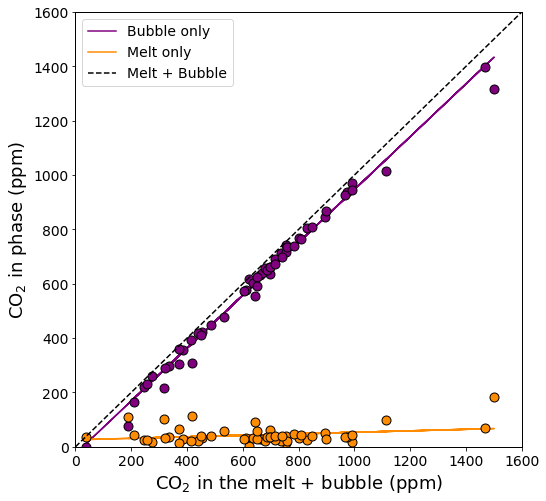

In [103]:
# create a figure and axes with matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,1600)
ax.set_ylim(0,1600)

# define x and y values to plot
x = data_values["CO2_ppm_total"] # CO2 in the melt alone
y1 = data_values["CO2_ppm_bubble"]
y2 = data_values["CO2_ppm_melt"]

x_11 = np.linspace(0,1600)

# calculate linear fits for each data grouping
coef1 = np.polyfit(x,y1,1)
poly1d_fn1 = np.poly1d(coef1) 
coef2 = np.polyfit(x,y2,1)
poly1d_fn2 = np.poly1d(coef2)

# add axis titles
ax.set_xlabel(r"$CO_2$ in the melt + bubble (ppm)")
ax.set_ylabel(r"$CO_2$ in phase (ppm)")

# add linear fits to the plot
ax.plot(x, poly1d_fn1(x), color="#800080", label="Bubble only")
ax.plot(x, poly1d_fn2(x), color="#FF8C03", label="Melt only")

# add data to the plot
ax.plot(x, y1, '.', color="#800080", markersize=18, mec="black")
ax.plot(x, y2, '.', color="#FF8C03", markersize=18, mec="black")
ax.plot(x_11, x_11, '--', color="black", label="Melt + Bubble")
plt.legend()

fig.savefig('KilaueaExercise_Figure1.png', dpi=400)   # save the figure to file

plt.show()

### 6. Use the total volatile contents of the inclusions to calculate saturation pressures using VESIcal.
Compare these pressures to those you calculated in Step 1. What can you conclude about the importance of analyzing bubbles in melt inclusions?

#### 6.1 Create a new VESIcal BatchFile
First, we'll create a new BatchFile for samples where we consider CO<sub>2</sub> in both the bubble and melt. VESIcal always assumes that the values under a column labeled "CO2" correspond to the CO<sub>2</sub> value to use in units of wt%. For the melt+bubble CO<sub>2</sub> batch file, we will copy the data_values object, and then overwrite the "CO2" column with the CO<sub>2</sub> concentration in total inclusion that we calculated above.

In [98]:
# VESIcal BatchFile with CO2 in melt+bubble combined
data_melt_plus_bubble = data_values
data_melt_plus_bubble["CO2"] = data_values["CO2_ppm_total"] / 10000
data_melt_plus_bubble = v.BatchFile_from_DataFrame(data_melt_plus_bubble)

#### 6.2 Calculate saturation pressures
Now, let's calculate the saturation pressures for all samples using where our CO<sub>2</sub> value is that of the CO<sub>2</sub> in the melt+bubble.

The MagmaSat model can take a couple of minutes to run this calculation. If desired, you may comment out the code in the cell directly below and uncomment and execute the code in the following cell, which will import a pickle file with this calculation already performed. You can also use another model within VESIcal such as the IaconoMarziano model.

In [99]:
SatPs_melt_plus_bubble = data_melt_plus_bubble.calculate_saturation_pressure(temperature=1200, model=model)

# add these values to our data_values object
data_values["SaturationP_bars_melt_plus_bubble"] = SatPs_melt_plus_bubble["SaturationP_bars_VESIcal"]

# pickle the calculated values to read back in later if so desired
with open('pickle/SatPs_melt_plus_bubble.pickle', 'wb') as handle:
    pickle.dump(SatPs_melt_plus_bubble, handle)

[                    ] 2%  Working on sample LL8_613b                            

duanDriver-2: t = 1473.15, p = 9000, z = 3.14992, v = 4.28685, delv = 0, dx = -1.23734e-13, iter = 42
[==                  ] 11%  Working on sample LL8_404_a                            duanDriver-2: t = 1473.15, p = 19000, z = 5.1592, v = 3.32591, delv = 0, dx = -3.69484e-14, iter = 44
duanDriver-2: t = 1473.15, p = 17000, z = 4.80553, v = 3.46237, delv = 0, dx = -5.21805e-14, iter = 43
[==                  ] 13%  Working on sample LL8_404_b                            duanDriver-2: t = 1473.15, p = 20000, z = 5.21917, v = 3.19634, delv = 0, dx = -4.70244e-14, iter = 44
[====                ] 22%  Working on sample LL8_630                              duanDriver-2: t = 1473.15, p = 6000, z = 2.52509, v = 5.15475, delv = 0, dx = -2.64321e-14, iter = 33
[====                ] 24%  Working on sample LL8_631a                            duanDriver-2: t = 1473.15, p = 8000, z = 2.95252, v = 4.52047, delv = 0, dx = -1.24683e-13, iter = 41
[======              ] 33%  Working on sample LL8_406  

In [100]:
with open('pickle/SatPs_melt_plus_bubble.pickle', 'rb') as handle:
    SatPs_melt_plus_bubble = pickle.load(handle)

# add these values to our data_values object
data_values["SaturationP_bars_melt_plus_bubble"] = SatPs_melt_plus_bubble["SaturationP_bars_VESIcal"]

#### 6.3 Plot up the data and compare
Let's plot saturation pressures calculated with only the melt CO<sub>2</sub>, only the bubble CO<sub>2</sub>, and the combined melt + bubble CO<sub>2</sub>.

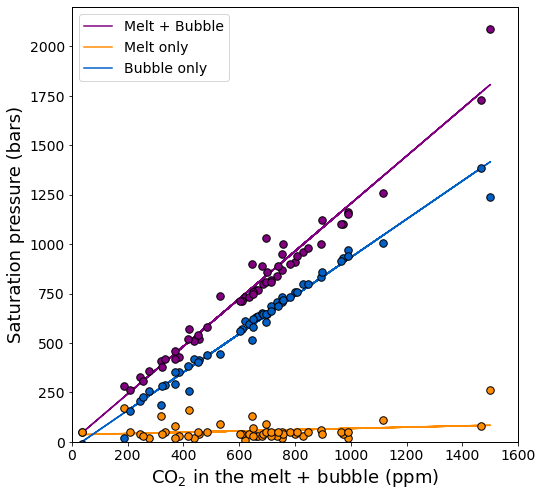

In [104]:
# create a figure and axes with matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,1600)
ax.set_ylim(0,2200)

# define x and y values to plot
x = data_values["CO2_ppm_total"] # CO2 in the melt alone
y1 = data_values["SaturationP_bars_melt_plus_bubble"]
y2 = data_values["SaturationP_bars_melt_only"]
y3 = x-y2

# calculate linear fits for each data grouping
coef1 = np.polyfit(x,y1,1)
poly1d_fn1 = np.poly1d(coef1) 
coef2 = np.polyfit(x,y2,1)
poly1d_fn2 = np.poly1d(coef2)
coef3 = np.polyfit(x,y3,1)
poly1d_fn3 = np.poly1d(coef3)

# add axis titles
ax.set_xlabel(r"$CO_2$ in the melt + bubble (ppm)")
ax.set_ylabel("Saturation pressure (bars)")

# add linear fits to the plot
ax.plot(x, poly1d_fn1(x), color="#800080", label="Melt + Bubble")
ax.plot(x, poly1d_fn2(x), color="#FF8C03", label="Melt only")
ax.plot(x, poly1d_fn3(x), color="#0160c6", label="Bubble only")

# add data to the plot
ax.plot(x, y1, '.', color="#800080", markersize=15, mec="black")
ax.plot(x, y2, '.', color="#FF8C03", markersize=15, mec="black")
ax.plot(x, y3, '.', color="#0160c6", markersize=15, mec="black")
plt.legend()

fig.savefig('KilaueaExercise_Figure2.png', dpi=400)   # save the figure to file

plt.show()

## Save all calculated data to an Excel or CSV file
You can compare your results with the answer key to this notebook, found in a CSV file called 'Kilauea_Exercise_KEY.csv'.


In [102]:
data_values.to_excel("Kilauea_Exercise_output.xlsx")
data_values.to_csv("Kilauea_Exercise_output.csv")